In [2]:
import pandas as pd
import json
import gzip

# Load the Amazon Digital Music dataset
data = []
with gzip.open('../data/Digital_Music_5.json.gz', 'rt', encoding='utf-8') as f:
    for line in f:
        data.append(json.loads(line))

df = pd.DataFrame(data)
print(df.shape)
df.head()

(169781, 12)


,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5.0,3,True,"06 3, 2013",A2TYZ821XXK2YZ,3426958910,{'Format:': ' Audio CD'},Garrett,"This is awesome to listen to, A must-have for ...",Slayer Rules!,1370217600,NaN
1,5.0,NaN,True,"10 11, 2014",A3OFSREZADFUDY,3426958910,{'Format:': ' Audio CD'},Ad,bien,Five Stars,1412985600,NaN
2,5.0,NaN,True,"02 11, 2014",A2VAMODP8M77NG,3426958910,{'Format:': ' Audio CD'},JTGabq,It was great to hear the old stuff again and I...,SLAYER!!!!!!!!!!!!!!!!!!!!!,1392076800,NaN
3,4.0,3,False,"12 7, 2013",AAKSLZ9IDTEH0,3426958910,{'Format:': ' Audio CD'},john F&#039;n doe,well best of's are a bit poison normally but t...,slayer greatest hits! you mean everything righ...,1386374400,NaN
4,5.0,NaN,True,"06 12, 2016",A3OH43OZJLKI09,5557706259,{'Format:': ' Audio CD'},melinda a goodman,What can I say? This is Casting Crowns!!!This ...,"This is a good, blessing filled",1465689600,NaN


In [3]:
df.columns.tolist()

['overall',
 'vote',
 'verified',
 'reviewTime',
 'reviewerID',
 'asin',
 'style',
 'reviewerName',
 'reviewText',
 'summary',
 'unixReviewTime',
 'image']

In [4]:
df['overall'].value_counts().sort_index()


overall
1.0      2192
2.0      1812
3.0      6792
4.0     23143
5.0    135842
Name: count, dtype: int64

In [6]:
# Drop 3-star reviews
df = df[df['overall'] != 3.0]

# Create sentiment label
df['sentiment'] = df['overall'].apply(lambda x: 1 if x >= 4 else 0)

# Check the result
df['sentiment'].value_counts()

sentiment
1    158985
0      4004
Name: count, dtype: int64

In [7]:
df[['reviewText', 'summary', 'overall', 'sentiment']].isnull().sum()

reviewText    158
summary        36
overall         0
sentiment       0
dtype: int64

In [8]:
# Keep only the columns we need and drop missing values
df = df[['reviewText', 'summary', 'sentiment']].dropna()

# Confirm the result
print(df.shape)
df.head()

(162819, 3)


,reviewText,summary,sentiment
0,"This is awesome to listen to, A must-have for ...",Slayer Rules!,1
1,bien,Five Stars,1
2,It was great to hear the old stuff again and I...,SLAYER!!!!!!!!!!!!!!!!!!!!!,1
3,well best of's are a bit poison normally but t...,slayer greatest hits! you mean everything righ...,1
4,What can I say? This is Casting Crowns!!!This ...,"This is a good, blessing filled",1


In [9]:
# Print a positive and negative review in full
print("POSITIVE REVIEW:")
print(df[df['sentiment'] == 1]['reviewText'].iloc[0])
print("\nNEGATIVE REVIEW:")
print(df[df['sentiment'] == 0]['reviewText'].iloc[0])

POSITIVE REVIEW:
This is awesome to listen to, A must-have for all Slayer fans..sadly needed to be a triple disc set..They have so many hits!!

NEGATIVE REVIEW:
I have gotten ripped on previously Casting Crowns reviews because I gave them 4 stars instead of 5...so there is no doubt people will go crazy with this review.  But with that being said, this CD just wasn't very good.  Once again Casting Crowns does what it does best - write songs pointing the finger at the church.  Yes, it was a good song with "If We Are The Body" and "Does Anybody Hear Her," but with "What This World Needs," it's just gotten old now.  It starts to become annoying when a band harps on one point, especially one that is as generalizing as saying the church isn't doing what it is supposed to.  Move on to another topic!!!

This CD also lacks the catchiness of the last 2 albums.  And where the last 2 CD's had a solid 6 or 7 songs on them, this album has 2 at most.  I just couldn't get into any of the songs.  Music

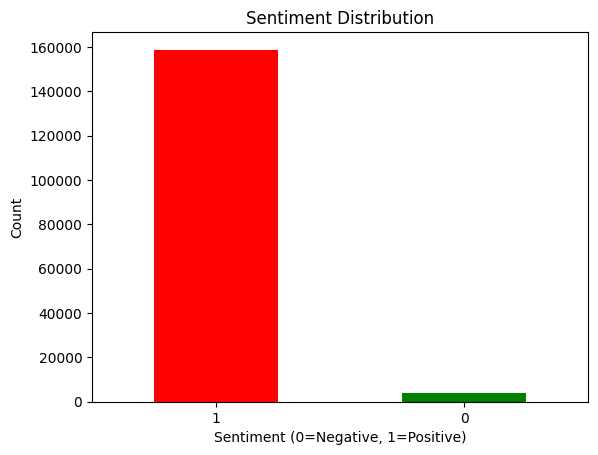

In [12]:
import matplotlib.pyplot as plt

df['sentiment'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment (0=Negative, 1=Positive)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [13]:
print(df['reviewText'].iloc[5])

Enjoy Casting Crowns and their songs


In [16]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize (split into words)
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Join back into a string
    return ' '.join(tokens)

# Test it on one review
print(clean_text("This is awesome to listen to, A must-have for all Slayer fans!!"))

awesome listen musthave slayer fans


In [18]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [22]:
df['cleaned_text'] = df['reviewText'].apply(clean_text)

# Check the result
df[['reviewText', 'cleaned_text']].head()

,reviewText,cleaned_text
0,"This is awesome to listen to, A must-have for ...",awesome listen musthave slayer fanssadly neede...
1,bien,bien
2,It was great to hear the old stuff again and I...,great hear old stuff like new stuff recommend ...
3,well best of's are a bit poison normally but t...,well best ofs bit poison normally bad pretty g...
4,What can I say? This is Casting Crowns!!!This ...,say casting crownsthis good blessing filled cd


In [23]:
df.to_csv('../data/cleaned_reviews.csv', index=False)
print("Saved!")

Saved!
